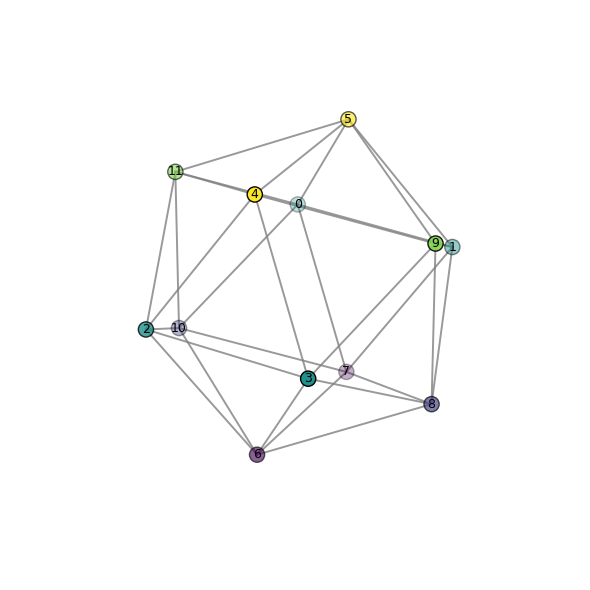

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------------------------
# Icosahedron geometry
# -------------------------------------------------
phi = (1 + np.sqrt(5)) / 2

vertices = np.array([
    (-1,  phi, 0), ( 1,  phi, 0),
    (-1, -phi, 0), ( 1, -phi, 0),
    (0, -1,  phi), (0,  1,  phi),
    (0, -1, -phi), (0,  1, -phi),
    ( phi, 0, -1), ( phi, 0,  1),
    (-phi, 0, -1), (-phi, 0,  1),
])

# Normalize to unit sphere
vertices /= np.linalg.norm(vertices, axis=1)[:, None]

# -------------------------------------------------
# Build graph via distance threshold
# -------------------------------------------------
G = nx.Graph()
for i in range(len(vertices)):
    G.add_node(i)

dist = np.linalg.norm(
    vertices[:, None, :] - vertices[None, :, :],
    axis=2
)

edge_threshold = 1.3 * np.min(dist[dist > 0])
for i in range(len(vertices)):
    for j in range(i + 1, len(vertices)):
        if dist[i, j] < edge_threshold:
            G.add_edge(i, j)

# -------------------------------------------------
# Node feature (example)
# -------------------------------------------------
features = vertices[:, 2]  # z-coordinate

# -------------------------------------------------
# 3D plot
# -------------------------------------------------
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

# Edges
for i, j in G.edges():
    ax.plot(
        [vertices[i, 0], vertices[j, 0]],
        [vertices[i, 1], vertices[j, 1]],
        [vertices[i, 2], vertices[j, 2]],
        color="gray",
        linewidth=1.4,
        alpha=0.8
    )

# Nodes
sc = ax.scatter(
    vertices[:, 0],
    vertices[:, 1],
    vertices[:, 2],
    c=features,
    cmap="viridis",
    s=120,
    edgecolors="black",
    depthshade=True
)

# Labels
for i, (x, y, z) in enumerate(vertices):
    ax.text(x, y, z, f"{i}", fontsize=9, ha="center", va="center")

# Styling
ax.set_box_aspect([1, 1, 1])
ax.axis("off")

plt.tight_layout()
plt.savefig("gnn_ikosahedral_raw.png",bbox_inches="tight",)
plt.show()


In [11]:
import numpy as np
from PIL import Image

img = Image.open("gnn_ikosahedral_raw.png")
arr = np.array(img)

non_empty = np.where(arr.mean(axis=2) < 250)
crop = (
    non_empty[1].min(),
    non_empty[0].min(),
    non_empty[1].max(),
    non_empty[0].max()
)

Image.fromarray(arr).crop(crop).save("gnn_ikosahedral.png")